# 1. Install Dependencies and Setup

In [1]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
agate                         1.6.3
aiohttp                       3.8.3
aiosignal                     1.2.0
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
Automat                       20.2.0
Babel                         2.10.3
backcall                      0.2.0
bcrypt                        4.0.1
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
boto3                         1.24.95
botocore                      1.27.95
branca                        0.5.0
cachetools                    5.2.0
catalogue 

In [2]:
import tensorflow as tf 
import os

2023-05-12 00:51:22.366052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 00:51:22.467970: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-12 00:51:22.473128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-12 00:51:22.473146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-05-12 00:51:27.378400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-12 00:51:27.378429: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-12 00:51:27.378442: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e12bc7d3-6b03-4608-9bcb-a03ef893b7a9): /proc/driver/nvidia/version does not exist


In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import imghdr

In [6]:
data_dir = '/work/Cancer'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image /work/Cancer/Lung Cancer/Lung cancer15.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer20.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer11.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer09.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer05.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer34.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer30.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer01.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer28.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer04.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer31.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer29.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer18.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer14.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer25.jpeg
Issue with image /work/Cancer/Lung Cancer/Lung cancer21.jpeg
Issue with image /work/C

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/work/Cancer')

Found 62 files belonging to 2 classes.
2023-05-12 00:51:27.903588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

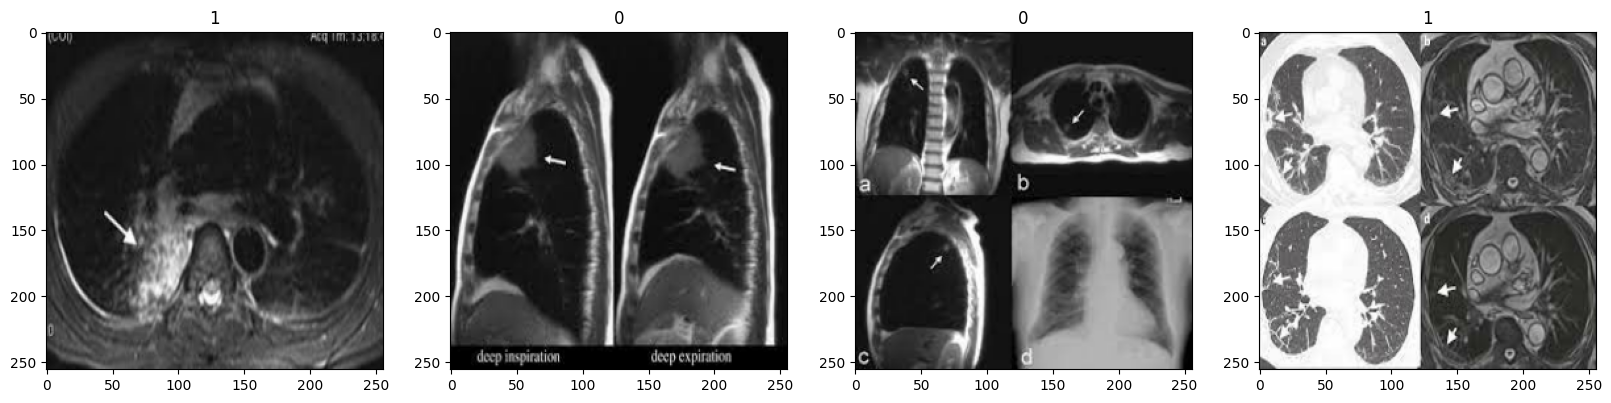

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.01556373, 0.01556373, 0.01556373],
          [0.04453125, 0.04453125, 0.04453125],
          [0.        , 0.        , 0.        ],
          ...,
          [0.25339308, 0.25339308, 0.25339308],
          [0.2509804 , 0.2509804 , 0.2509804 ],
          [0.24754135, 0.24754135, 0.24754135]],
 
         [[0.02943684, 0.02943684, 0.02943684],
          [0.0305016 , 0.0305016 , 0.0305016 ],
          [0.01849422, 0.01849422, 0.01849422],
          ...,
          [0.24671416, 0.24671416, 0.24671416],
          [0.2432481 , 0.2432481 , 0.2432481 ],
          [0.24065699, 0.24065699, 0.24065699]],
 
         [[0.05006747, 0.05006747, 0.05006747],
          [0.01120767, 0.01120767, 0.01120767],
          [0.04201026, 0.04201026, 0.04201026],
          ...,
          [0.23888634, 0.23888634, 0.23888634],
          [0.23410599, 0.23410599, 0.23410599],
          [0.23257282, 0.23257282, 0.23257282]],
 
         ...,
 
         [[0.01960784, 0.01960784, 0.01960784],
          [0.01960

# 5. Split Data

In [16]:
count = 0
for batch in data:
    count += len(batch[0])
train_size = int(count * 0.7)
val_size = int(count * 0.2)
test_size = int(count * 0.1)


In [17]:
train_size

43

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 1s 143ms/step - loss: 1.2931 - accuracy: 0.4355
Epoch 2/20
2/2 [==============================] - 0s 185ms/step - loss: 0.7452 - accuracy: 0.5323
Epoch 3/20
2/2 [==============================] - 0s 193ms/step - loss: 0.7457 - accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 133ms/step - loss: 0.6854 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 170ms/step - loss: 0.6641 - accuracy: 0.6129
Epoch 6/20
2/2 [==============================] - 0s 194ms/step - loss: 0.6467 - accuracy: 0.8710
Epoch 7/20
2/2 [==============================] - 0s 131ms/step - loss: 0.6183 - accuracy: 0.8710
Epoch 8/20
2/2 [==============================] - 0s 167ms/step - loss: 0.5922 - accuracy: 0.7581
Epoch 9/20
2/2 [==============================] - 0s 191ms/step - loss: 0.5213 - accuracy: 0.8387
Epoch 10/20
2/2 [==============================] - 0s 188ms/step - loss: 0.4746 - accuracy: 0.8387
Epoch 11/20
2/2 [==

# 8. Plot Performance

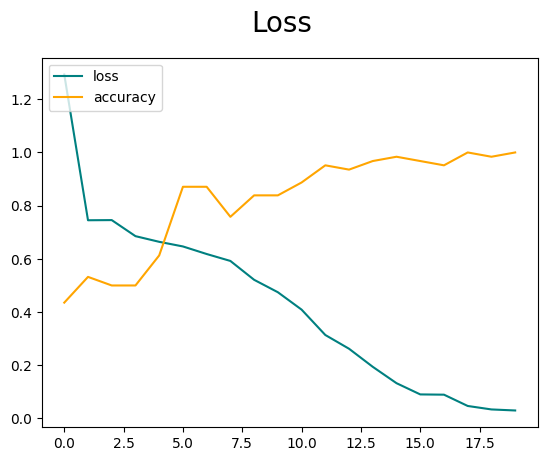

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [31]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(20):
    hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])
    train_loss.append(hist.history['loss'][0])
    train_accuracy.append(hist.history['accuracy'][0])


results = pd.DataFrame({'Train Accuracy': train_accuracy,
                       'Train Loss': train_loss,
                       'Epochs': range(1, 21)})

print(results)

2/2 [==============================] - 0s 184ms/step - loss: 1.6105e-04 - accuracy: 1.0000
    Train Accuracy  Train Loss  Epochs
0         0.983871    0.021581       1
1         1.000000    0.011209       2
2         1.000000    0.003603       3
3         1.000000    0.007723       4
4         1.000000    0.004813       5
5         1.000000    0.001935       6
6         1.000000    0.001495       7
7         1.000000    0.002285       8
8         1.000000    0.001706       9
9         1.000000    0.000769      10
10        1.000000    0.000424      11
11        1.000000    0.000331      12
12        1.000000    0.000370      13
13        1.000000    0.000407      14
14        1.000000    0.000422      15
15        1.000000    0.000381      16
16        1.000000    0.000328      17
17        1.000000    0.000246      18
18        1.000000    0.000192      19
19        1.000000    0.000161      20


# 10. Test

In [32]:
from PIL import Image

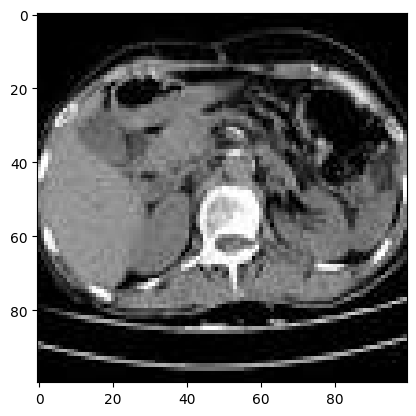

In [33]:
img = Image.open('/work/Cancer2/GS/GS04.jpeg')
plt.imshow(img)
plt.show()


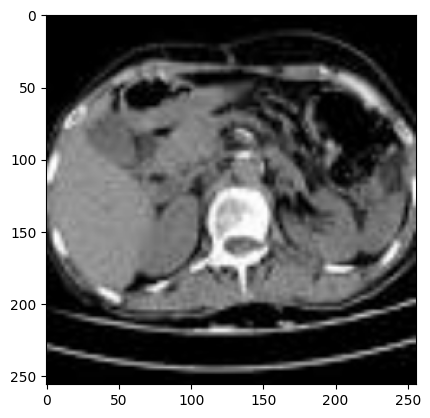

In [34]:

# Convert the image to a tensor
img_tensor = tf.keras.preprocessing.image.img_to_array(img)

# Resize the tensor
resize = tf.image.resize(img_tensor, (256,256))

# Display the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
img_rgb = img.convert('RGB')
img_resized = img_rgb.resize((256, 256))

# Convert to numpy array
img_array = np.array(img_resized)

# Preprocess image and make prediction
yhat = model.predict(np.expand_dims(img_array/255, 0))


1/1 [==============================] - 0s 84ms/step


In [36]:
predicted_class = np.argmax(yhat)

test_accuracy = yhat[0][predicted_class]
test_loss = -np.log(yhat[0][predicted_class])

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.45920053
Test Loss: 0.7782683


In [37]:
if yhat < 0.5: 
    print(f'Predicted class is Gallstones')
else:
    print(f'Predicted class is Pancreatic Cancer')

Predicted class is COPD


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e12bc7d3-6b03-4608-9bcb-a03ef893b7a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>